<a href="https://colab.research.google.com/github/robert-shepherd/fpl/blob/main/Project_3_3_principal_component_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal component regression model


---

The purpose of this script is to develop the linear regression model
using PCA

Data sources:
* Data post feature engineering:  https://raw.githubusercontent.com/robert-shepherd/fpl/main/fpl_features.csv


In [ ]:
# Loading libraries
import pandas as pd
import pickle
import numpy as np
import scipy.stats as stats
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Libraries to build PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Model libraries
from sklearn.linear_model import LinearRegression

# Import measures
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Setup

In [ ]:
# Reading in files from static output
X_train_url = 'https://raw.githubusercontent.com/robert-shepherd/fpl/main/X_train.csv'
X_test_url = 'https://raw.githubusercontent.com/robert-shepherd/fpl/main/X_test.csv'
Y_train_url = 'https://raw.githubusercontent.com/robert-shepherd/fpl/main/Y_train.csv'
Y_test_url = 'https://raw.githubusercontent.com/robert-shepherd/fpl/main/Y_test.csv'

X_train = pd.read_csv(X_train_url)
X_test = pd.read_csv(X_test_url)
Y_train = pd.read_csv(Y_train_url,squeeze=True)
Y_test = pd.read_csv(Y_test_url,squeeze=True)

print('X_train      : ',X_train.shape)
print('X_test       : ',X_test.shape)
print('Y_train      : ',Y_train.shape)
print('Y_test       : ',Y_test.shape)

X_train      :  (40388, 40)
X_test       :  (10098, 40)
Y_train      :  (40388,)
Y_test       :  (10098,)


In [ ]:
# Removing missing from initial checks
train_na = X_train.isnull().any(axis=1)
test_na = X_test.isnull().any(axis=1)

X_train_no_na = X_train[~train_na]
Y_train_no_na = Y_train[~train_na]

X_test_no_na = X_test[~test_na]
Y_test_no_na = Y_test[~test_na]

print('X_train_no_na      : ',X_train_no_na.shape)
print('X_test_no_na       : ',X_test_no_na.shape)
print('Y_train_no_na      : ',Y_train_no_na.shape)
print('Y_test_no_na       : ',Y_test_no_na.shape)

X_train_no_na      :  (32698, 40)
X_test_no_na       :  (8195, 40)
Y_train_no_na      :  (32698,)
Y_test_no_na       :  (8195,)


## Develop PCA

In [ ]:
# Viewing data pre scaled
X_train_no_na.head()

,opponent_strength,points_lag_1,points_lag_2,points_lag_3,points_lag_4,points_lag_5,minutes_lag,minutes_rolling,goals_scored_lag,goals_scored_rolling,assists_lag,assists_rolling,clean_sheets_lag,clean_sheets_rolling,goals_conceded_lag,goals_conceded_rolling,saves_lag,saves_rolling,cards_lag,cards_rolling,bonus_lag,bonus_rolling,bps_lag,bps_rolling,influence_lag,influence_rolling,creativity_lag,creativity_rolling,threat_lag,threat_rolling,selected_lag,selected_rolling,transfers_in_ratio_lag,transfers_in_ratio_rolling,transfers_out_ratio_lag,transfers_out_ratio_rolling,was_home_True,position_FWD,position_GKP,position_MID
1,3,0.0,0.0,1.0,2.0,1.0,0.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.8,0.0,1.04,0.0,4.820000e+00,0.0,5.2,83405.0,94050.0,0.003741,0.037236,0.102979,0.101427,0,0,0,1
2,2,1.0,0.0,0.0,0.0,0.0,58.0,11.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.8,1.56,1.1,2.200000e-01,38.0,7.6,129215.0,131939.0,0.005719,0.006338,0.022822,0.024041,0,0,0,1
3,3,6.0,6.0,1.0,0.0,0.0,90.0,43.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,11.0,17.0,8.56,0.4,2.200000e+00,2.0,0.4,8198.0,6909.8,0.233594,0.061205,0.046963,0.060232,0,0,0,0
4,4,3.0,1.0,2.0,2.0,2.0,90.0,73.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.8,0.0,0.0,0.0,0.2,0.0,0.0,11.0,13.2,12.2,11.64,19.8,3.108000e+01,0.0,0.4,377753.0,393196.4,0.036508,0.040806,0.056518,0.059588,0,0,0,1
5,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,9.663381e-14,0.0,0.0,8018.0,8132.4,0.007483,0.007614,0.014842,0.022178,0,0,0,0


In [ ]:
# Scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_no_na)
X_test_scaled = scaler.transform(X_test_no_na)

In [ ]:
# Creating PCA
pca = PCA()
X_train_pc = pca.fit_transform(X_train_scaled)
X_test_pc = pca.transform(X_test_scaled)

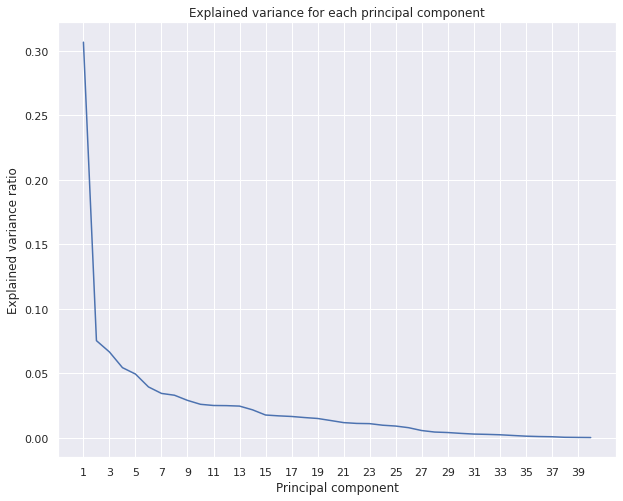

In [ ]:
# Setting default Seaborn style
sns.set(rc={'figure.figsize':(10,8)})

# Plot the explained variance ratio
principal_component = range(1,41)
explained_variance = pca.explained_variance_ratio_
plt.plot(principal_component,explained_variance)
xt = np.arange(1,41,2)
plt.xticks(xt)

plt.title("Explained variance for each principal component")
plt.xlabel('Principal component')
plt.ylabel('Explained variance ratio')
plt.show()


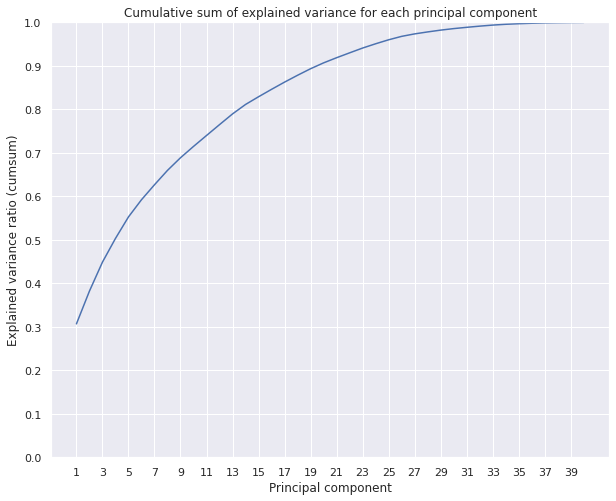

In [ ]:
# Setting default Seaborn style
sns.set(rc={'figure.figsize':(10,8)})

# Plot the explained variance ratio
principal_component = range(1,41)
explained_variance = pca.explained_variance_ratio_.cumsum()
plt.plot(principal_component,explained_variance)
xt = np.arange(1,41,2)
plt.xticks(xt)
yt = np.arange(0,1.1,0.1)
plt.yticks(yt)
plt.ylim(0,1)

plt.title("Cumulative sum of explained variance for each principal component")
plt.xlabel('Principal component')
plt.ylabel('Explained variance ratio (cumsum)')
plt.show()


In [ ]:
# Contributions to components
component_1 = pca.components_[0]
component_2 = pca.components_[1]

# Linking back to original features
df_columns = X_test_no_na.columns

component_1_df = pd.DataFrame(df_columns,columns=['feature'])
component_1_df['component_contribution'] = component_1
component_1_df['abs_component_contribution'] = abs(component_1)

component_2_df = pd.DataFrame(df_columns,columns=['feature'])
component_2_df['component_contribution'] = component_2
component_2_df['abs_component_contribution'] = abs(component_2)

In [ ]:
# Viewing top features to component 1
component_1_df.sort_values(by=['abs_component_contribution']
                           ,ascending=False).head(20)

,feature,component_contribution,abs_component_contribution
23,bps_rolling,0.262546,0.262546
25,influence_rolling,0.261580,0.261580
7,minutes_rolling,0.242480,0.242480
6,minutes_lag,0.228309,0.228309
22,bps_lag,0.227076,0.227076
24,influence_lag,0.221480,0.221480
1,points_lag_1,0.217917,0.217917
21,bonus_rolling,0.211269,0.211269
29,threat_rolling,0.204457,0.204457
27,creativity_rolling,0.199843,0.199843


In [ ]:
# Viewing top features to component 2
component_2_df.sort_values(by=['abs_component_contribution']
                           ,ascending=False).head(20)

,feature,component_contribution,abs_component_contribution
17,saves_rolling,-0.462184,0.462184
16,saves_lag,-0.433875,0.433875
38,position_GKP,-0.346496,0.346496
29,threat_rolling,0.221657,0.221657
28,threat_lag,0.201709,0.201709
9,goals_scored_rolling,0.197445,0.197445
39,position_MID,0.177167,0.177167
15,goals_conceded_rolling,-0.166196,0.166196
11,assists_rolling,0.163056,0.163056
27,creativity_rolling,0.160408,0.160408


## Finding the optimal number of components using cross validation

In [ ]:
# Identifying optimum components
n_components = len(pca.components_)

pc_components = range(1,n_components)
cv_r2_mean_scores = []

for i in pc_components:
  model = LinearRegression()
  R2_CV_scores = cross_val_score(model, X_train_pc[:,:i], Y_train_no_na, cv=10, 
                       n_jobs=-1)
  cv_r2 = R2_CV_scores.mean()
  cv_r2_mean_scores.append(cv_r2)

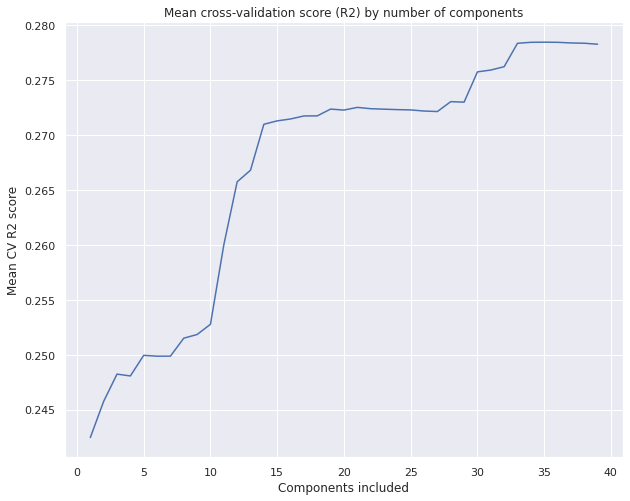

In [ ]:
# Plotting CV performance by depth
plt.figure(figsize=(10,8))
plt.plot(pc_components,cv_r2_mean_scores)
plt.title('Mean cross-validation score (R2) by number of components')
plt.xlabel('Components included')
plt.ylabel("Mean CV R2 score")
plt.show()

In [ ]:
# Find tree depth where CV R2 is highest
max_score = max(cv_r2_mean_scores)

max_index = cv_r2_mean_scores.index(max_score)

pc_components[max_index]

35

## Updating the model to include only 35 components

In [ ]:
# Training model on 35 components
pcr = LinearRegression()
pcr.fit(X_train_pc[:,:35],Y_train_no_na)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Predicting on test
y_pred_pcr = pcr.predict(X_test_pc[:,:35])

In [ ]:
# Checking min/max prediction
min_pred = min(y_pred_pcr)
max_pred = max(y_pred_pcr)
print("Min prediction: {}".format(min_pred))
print("Max prediction: {}".format(max_pred))

Min prediction: -0.5101445379383533
Max prediction: 7.256629367977657


In [ ]:
# Checking MSE
mse = mean_squared_error(Y_test_no_na, y_pred_pcr)
print("Test MSE: {}".format(mse))

Test MSE: 4.752181972401202


In [ ]:
# Checking R2
r2 = r2_score(Y_test_no_na, y_pred_pcr)
print("Test R2: {}".format(r2))

Test R2: 0.253536509118962
